<a href="https://colab.research.google.com/github/pduyn308/ANN/blob/Palm-Recognition/Palm_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("feyiamujo/human-palm-images")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/human-palm-images


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

palm_classes = ['FEMALE', 'MALE']
image_size = 64

data = []
labels = []

for i, palm in enumerate(palm_classes):
    folder = os.path.join(path, palm)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

data = np.array(data)
labels = to_categorical(labels, num_classes=len(palm_classes))

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(512, activation='relu', input_shape=(image_size * image_size * 3,)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(palm_classes), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5476 - loss: 4.5105 - val_accuracy: 0.5000 - val_loss: 1.1100
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.4999 - loss: 1.7388 - val_accuracy: 0.5063 - val_loss: 0.7013
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5105 - loss: 0.9392 - val_accuracy: 0.5063 - val_loss: 0.6947
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5286 - loss: 0.8088 - val_accuracy: 0.5000 - val_loss: 0.6957
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.4639 - loss: 0.6967 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.4726 - loss: 0.6939 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.4976 - loss: 0.6933 - val_accuracy: 0.5000 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


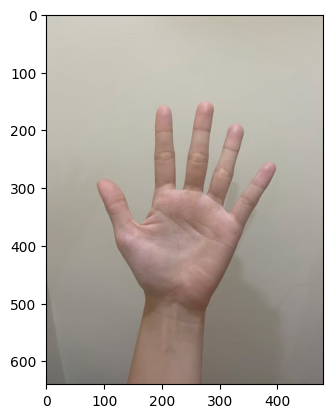

Predicted Gender: MALE


In [14]:
import cv2

def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/tay.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)


img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
print(f"Predicted Gender: {palm_classes[predicted_class]}")